In [ ]:
"""
Saving all the plots on Google Colab.
"""
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the required libraries.
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
def get_closing_plots(ticker):
    plt.style.use("fivethirtyeight")

    # Get the stock details, in a dataframe using Pandas, for a given ticker.
    df = yf.download(ticker, start="2023-01-01", end="2024-03-20")

    # Create a new dataframe with only the "Delta" column.
    data = df.filter(["Close"])
    # Converting the dataframe into a NumPy array.
    dataset = data.values

    # Hyperparameters of the model.
    days, fraction = 7, 0.80

    # Get the number of training examples.
    training_data_len = int(math.ceil(fraction * len(dataset)))

    # Data preprocessing: Scale the data.
    scaler = MinMaxScaler(feature_range=(0, 1)) # As values can be negative.
    scaled_data = scaler.fit_transform(dataset)

    """
    Training the model.
    """
    # Create the scaled training dataset.
    train_data = scaled_data[:training_data_len, :]

    # Split the data into x_train and y_train dataset.
    x_train, y_train = [], []

    # Append the past days-day values.
    for i in range(days, len(train_data)):
        x_train.append(train_data[i - days:i, 0])
        y_train.append(train_data[i, 0])

    """
    x_train array contains the past days-day value of the (closing - opening) price of the stock.
    y_train contains the (days + 1)th day value that we want our model to be able to predict based on those
    past days-day delta prices.
    """

    # Convert the x_train and y_train dataset to NumPy arrays.
    x_train, y_train = np.array(x_train), np.array(y_train)

    # Reshape the x_train dataset.
    """
    LSTM Network expects the data to be 3-D: Number of samples, timestamps, features.
    """
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # Build the LSTM Model Architecture.
    model = Sequential()

    # Add the first LSTM layer with 500 neurons.
    model.add(LSTM(50, activation="relu", input_shape=(x_train.shape[1], 1)))

    # # Adding more LSTM layers
    # model.add(LSTM(300, return_sequences=True))
    # model.add(LSTM(100, return_sequences=True))
    # model.add(LSTM(80, return_sequences=True))
    # model.add(LSTM(50, return_sequences=True))
    # Last LSTM layer with 30 neurons. It won't return any sequence.
    # model.add(LSTM(30, return_sequences=False))
    # Adding further layers: Dense layers
    # model.add(Dense(10))
    # Output layer
    model.add(Dense(1))

    # Compile the model.
    model.compile(optimizer="adam", loss="mean_squared_error")
    # Train the model.
    """
    No. of forward and backward passes for backpropagation algorithm = 100.
    Batch size = 1.
    """
    model.fit(x_train, y_train, batch_size=1, epochs=1)

    # Save the model into a directory.
    model.save(f'/content/drive/My Drive/trading/self_attempt/models/{ticker}')

    # Create the testing dataset.
    test_data = scaled_data[training_data_len - days:, :]
    # Create the datasets x_test and y_test.
    x_test = []
    y_test = dataset[training_data_len:, :]
    for i in range(days, len(test_data)):
        x_test.append(test_data[i - days:i, 0])

    # Convert the data to a NumPy array.
    x_test = np.array(x_test)
    # Reshape the data.
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    # Get the model's predicted price values.
    predictions = model.predict(x_test)
    # Unscale the values to compare the predictions.
    predictions = scaler.inverse_transform(predictions)

    # Plot the data.
    train = data[:training_data_len]
    valid = data[training_data_len:]
    valid["Predictions"] = predictions

    # Visualise the model.
    # plt.figure(figsize=(16, 8))
    plt.title("LSTM Model Ananlysis")
    plt.plot(100 * (valid["Predictions"] - valid["Close"]) / valid["Close"], label=f"{ticker}")
    plt.xlabel("Predicted Values", fontsize=5)
    plt.ylabel("Observed Values")

[*********************100%%**********************]  1 of 1 completed


220/220 [==============================] - 3s 4ms/step - loss: 0.0214


2/2 [==============================] - 0s 8ms/step


<ipython-input-12-54e1dc93c9cf>:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions
[*********************100%%**********************]  1 of 1 completed


220/220 [==============================] - 3s 6ms/step - loss: 0.0092


2/2 [==============================] - 0s 8ms/step


<ipython-input-12-54e1dc93c9cf>:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions
[*********************100%%**********************]  1 of 1 completed


220/220 [==============================] - 2s 4ms/step - loss: 0.0691


2/2 [==============================] - 0s 7ms/step


<ipython-input-12-54e1dc93c9cf>:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions
[*********************100%%**********************]  1 of 1 completed


220/220 [==============================] - 4s 7ms/step - loss: 0.0297


2/2 [==============================] - 0s 8ms/step


<ipython-input-12-54e1dc93c9cf>:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions
[*********************100%%**********************]  1 of 1 completed


91/91 [==============================] - 2s 4ms/step - loss: 0.1461


1/1 [==============================] - 0s 204ms/step


<ipython-input-12-54e1dc93c9cf>:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions
[*********************100%%**********************]  1 of 1 completed


220/220 [==============================] - 2s 4ms/step - loss: 0.0185


2/2 [==============================] - 0s 9ms/step


<ipython-input-12-54e1dc93c9cf>:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions
[*********************100%%**********************]  1 of 1 completed


220/220 [==============================] - 3s 4ms/step - loss: 0.0089


2/2 [==============================] - 0s 8ms/step


<ipython-input-12-54e1dc93c9cf>:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions
[*********************100%%**********************]  1 of 1 completed


220/220 [==============================] - 2s 4ms/step - loss: 0.0321


2/2 [==============================] - 0s 8ms/step


<ipython-input-12-54e1dc93c9cf>:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions
[*********************100%%**********************]  1 of 1 completed


220/220 [==============================] - 2s 5ms/step - loss: 0.0070


2/2 [==============================] - 0s 8ms/step


<ipython-input-12-54e1dc93c9cf>:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions
[*********************100%%**********************]  1 of 1 completed


220/220 [==============================] - 3s 4ms/step - loss: 0.0506


2/2 [==============================] - 0s 10ms/step


<ipython-input-12-54e1dc93c9cf>:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions
[*********************100%%**********************]  1 of 1 completed


220/220 [==============================] - 2s 4ms/step - loss: 0.0423


2/2 [==============================] - 0s 8ms/step


<ipython-input-12-54e1dc93c9cf>:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions
[*********************100%%**********************]  1 of 1 completed


220/220 [==============================] - 2s 4ms/step - loss: 0.0311


2/2 [==============================] - 0s 9ms/step


<ipython-input-12-54e1dc93c9cf>:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions
[*********************100%%**********************]  1 of 1 completed


220/220 [==============================] - 2s 4ms/step - loss: 0.0437


2/2 [==============================] - 0s 8ms/step


<ipython-input-12-54e1dc93c9cf>:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions
[*********************100%%**********************]  1 of 1 completed


220/220 [==============================] - 2s 4ms/step - loss: 0.0252


2/2 [==============================] - 0s 8ms/step


<ipython-input-12-54e1dc93c9cf>:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions
[*********************100%%**********************]  1 of 1 completed


220/220 [==============================] - 3s 5ms/step - loss: 0.0065


2/2 [==============================] - 0s 6ms/step


<ipython-input-12-54e1dc93c9cf>:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions
[*********************100%%**********************]  1 of 1 completed


220/220 [==============================] - 2s 4ms/step - loss: 0.0577


2/2 [==============================] - 0s 8ms/step


<ipython-input-12-54e1dc93c9cf>:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions
[*********************100%%**********************]  1 of 1 completed


220/220 [==============================] - 4s 6ms/step - loss: 0.0290


2/2 [==============================] - 0s 11ms/step


<ipython-input-12-54e1dc93c9cf>:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions
[*********************100%%**********************]  1 of 1 completed


220/220 [==============================] - 2s 4ms/step - loss: 0.0201


2/2 [==============================] - 0s 8ms/step


<ipython-input-12-54e1dc93c9cf>:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions
[*********************100%%**********************]  1 of 1 completed


220/220 [==============================] - 3s 6ms/step - loss: 0.0057


2/2 [==============================] - 0s 8ms/step


<ipython-input-12-54e1dc93c9cf>:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions
[*********************100%%**********************]  1 of 1 completed


220/220 [==============================] - 2s 4ms/step - loss: 0.0089


2/2 [==============================] - 0s 9ms/step


<ipython-input-12-54e1dc93c9cf>:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


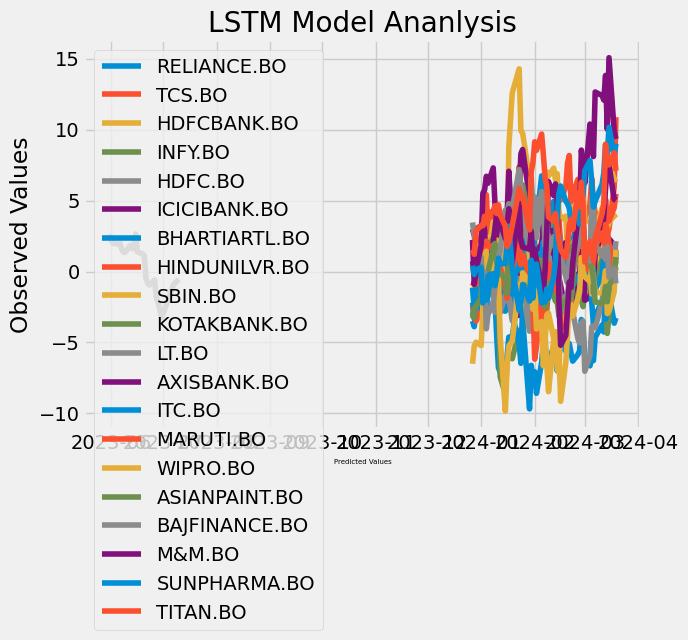

In [15]:
tickers = [
    "RELIANCE.BO",
    "TCS.BO",
    "HDFCBANK.BO",
    "INFY.BO",
    "HDFC.BO",
    "ICICIBANK.BO",
    "BHARTIARTL.BO",
    "HINDUNILVR.BO",
    "SBIN.BO",
    "KOTAKBANK.BO",
    "LT.BO",
    "AXISBANK.BO",
    "ITC.BO",
    "MARUTI.BO",
    "WIPRO.BO",
    "ASIANPAINT.BO",
    "BAJFINANCE.BO",
    "M&M.BO",
    "SUNPHARMA.BO",
    "TITAN.BO"
]

plt.figure()
for ticker in tickers:
    get_closing_plots(ticker)
plt.legend()
plt.savefig(f'/content/drive/My Drive/trading/self_attempt/plots.png')